In [1]:
import pandas as pd

# 섭취기준 데이터 읽기
standard = pd.read_excel("./섭취기준_데이터/(17개 영양소)한국인 영양소 섭취기준.xlsx")
standard

,성별,연령,조합 코드,곱한 수치,에너지(kcal/일),단백질(g/일),지방(g/일),탄수화물(g/일),총 당류(g/일),식이섬유(g/일),...,나트륨(mg/일),아연(mg/일),구리(mg/일),망간(mg/일),셀레늄(μg/일),비타민 D(μg/일),판토텐산(mg/일),엽산DFE/일)3),비타민 B12(μg/일),콜레스테롤(mg/일/미만)
0,남성,50-64세,기본,기본,733.333333,20.000000,17.666667,82.333333,27.333333,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
1,남성,50-64세,01,1.5675,1149.500000,31.350000,27.692500,129.057500,42.845000,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
2,남성,50-64세,02,1.767,1295.800000,35.340000,31.217000,145.483000,48.298000,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
3,남성,50-64세,03,1.966,1441.733333,39.320000,34.732667,161.867333,53.737333,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
4,남성,50-64세,11,1.375,1008.333333,27.500000,24.291667,113.208333,37.583333,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
5,남성,50-64세,12,1.55,1136.666667,31.000000,27.383333,127.616667,42.366667,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
6,남성,50-64세,13,1.725,1265.000000,34.500000,30.475000,142.025000,47.150000,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
7,남성,50-64세,21,1.1825,867.166667,23.650000,20.890833,97.359167,32.321667,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
8,남성,50-64세,22,1.333,977.533333,26.660000,23.549667,109.750333,36.435333,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100
9,남성,50-64세,23,1.4835,1087.900000,29.670000,26.208500,122.141500,40.549000,8.333333,...,500.000000,3.000000,0.266667,1.333333,20,3.333333,1.666667,133.333333,0.8,100


### 폴더에 있는 파일들 for loop로 돌리기 _ listdir 모듈을 사용

설명 링크: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

링크 내용

os.listdir() will get you everything that's in a directory - files and directories.

If you want just files, you could either filter this down using os.path:

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
or you could use os.walk() which will yield two lists for each directory it visits - splitting into files and dirs for you. If you only want the top directory you can just break the first time it yields

from os import walk

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

In [122]:
# 폴더 내의 모든 파일들을 읽어오는 코드
from os import listdir

onlyfiles = [f for f in listdir("./식단추출_데이터")]
onlyfiles

['남성_50-64세_11_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '남성_50-64세_31_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '남성_65-74세_21_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '남성_75이상_02_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '여성_50-64세_11_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '여성_65-74세_02_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '여성_65-74세_41_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '여성_75이상_11_밥_육류찌개_두류부침찜_찜구이.xlsx']

In [117]:
import re
import numpy as np
# 전체 파일을 돌면서 영양소 정보를 더해준다.

for file in onlyfiles:
    # 엑셀파일 확장자 삭제
    del_extension = re.sub("[.]xlsx","",file)
    
    # 각 파일의 정보 단위로 쪼갠 리스트 만들기
    # 3번항목: 밥 / 4번항목: 국 / 5번항목: 메인 / 6번항목: 서브
    info_list = del_extension.split("_")
    print(info_list[3],info_list[4],info_list[5],info_list[6])
    # 식단파일을 dataframe으로 읽기
    diet = pd.read_excel("./식단추출_데이터/"+file)
    # column 별로 파일을 읽어서 각 식단의 음식의 영양소 정보를 해당 row에 축적해서 더해준다.
    밥 = pd.read_excel("./음식_데이터/"+info_list[3]+".xlsx")
    국 = pd.read_excel("./음식_데이터/"+info_list[4]+".xlsx")
    메인 = pd.read_excel("./음식_데이터/"+info_list[5]+".xlsx")
    서브 = pd.read_excel("./음식_데이터/"+info_list[6]+".xlsx")
    search_list = ["밥","국","메인","서브"]
    영양소정보_리스트 = {}
    영양소정보_리스트["밥"] = []
    영양소정보_리스트["국"] = []
    영양소정보_리스트["메인"] = []
    영양소정보_리스트["서브"] = []
    for keyword in search_list:
        if keyword == "밥":
            비교파일 = 밥
        elif keyword == "국":
            비교파일 = 국
        elif keyword == "메인":
            비교파일 = 메인
        elif keyword == "서브":
            비교파일 = 서브
        for dish in diet[keyword]:
            음식정보 = 비교파일[비교파일.iloc[:,0]==dish]
            영양소정보 = 음식정보.iloc[:,5:]
            영양소정보_리스트[keyword].append(list(영양소정보.values)[0])

    영양소_총계 = np.array(영양소정보_리스트["밥"])+np.array(영양소정보_리스트["국"])+np.array(영양소정보_리스트["메인"])+np.array(영양소정보_리스트["서브"])
    최종데이터 = pd.concat([diet,pd.DataFrame(영양소_총계)],axis = 1)
    최종데이터.columns = ["식단번호"] + list(diet.columns[1:])+list(밥.columns[5:])
    최종데이터.to_excel("(영양소추가)"+file)
            
    
    

밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이
밥 육류찌개 두류부침찜 찜구이


In [2]:
from os import listdir

onlyfiles = [f for f in listdir("./영양소추가_식단추출_데이터")]
onlyfiles

['(영양소추가)남성_50-64세_11_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)남성_50-64세_31_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)남성_65-74세_21_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)남성_75이상_02_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)여성_50-64세_11_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)여성_65-74세_02_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)여성_65-74세_41_밥_육류찌개_두류부침찜_찜구이.xlsx',
 '(영양소추가)여성_75이상_11_밥_육류찌개_두류부침찜_찜구이.xlsx']

['C:\\Windows\\Fonts\\NanumSquareRoundL.ttf',
 'C:\\WINDOWS\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\ENLIBRTY.TTF',
 'C:\\Windows\\Fonts\\MAGNETOB.TTF',
 'C:\\WINDOWS\\Fonts\\PERTIBD.TTF',
 'C:\\Users\\ok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenR.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\WINDOWS\\Fonts\\TCB_____.TTF',
 'C:\\WINDOWS\\Fonts\\YINP05.TTF',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\HANDotumExt.ttf',
 'C:\\WINDOWS\\Fonts\\framdit.ttf',
 'C:\\WINDOWS\\Fonts\\HYCYSM.TTF',
 'C:\\WINDOWS\\Fonts\\HANYGO250.ttf',
 'C:\\Windows\\Fonts\\HYKANB.TTF',
 'C:\\WINDOWS\\Fonts\\ITCKRIST.TTF',
 'C:\\WINDOWS\\Fonts\\HANDotum.ttf',
 'C:\\WINDOWS\\Fonts\\segoeuii.ttf',
 'C:\\WINDOWS\\Fonts\\ENCSCH.TTF',
 'C:\\WINDOWS\\Fonts\\HYBDAM.TTF',
 'C:\\Windows\\Fonts\\MOD20.TTF',
 'C:\\Windows\\Fonts\\YuGothB.ttc',
 'C:\\WINDOWS\\Fonts\\HMKLP.TTF',
 'C:\\WINDOWS\\Fonts\\SHOWG.TTF',
 'C:\\WINDOWS\\Fonts\\HANYGO240.ttf',
 'C:\\Windows\\Fonts\\NanumGothicLight.ttf

In [30]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm._rebuild() # 시스템에 폰트파일 복사 후 최초 1회 수행
# 폰트 설정
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/HMKBA.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
print('font_name:', font_name)
matplotlib.rc('font', family=font_name)
plt.rcParams.update({'font.size': 40})
%matplotlib inline

font_name: ??????


[]

NameError: name 'font_manager' is not defined

C:\Users\ok\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


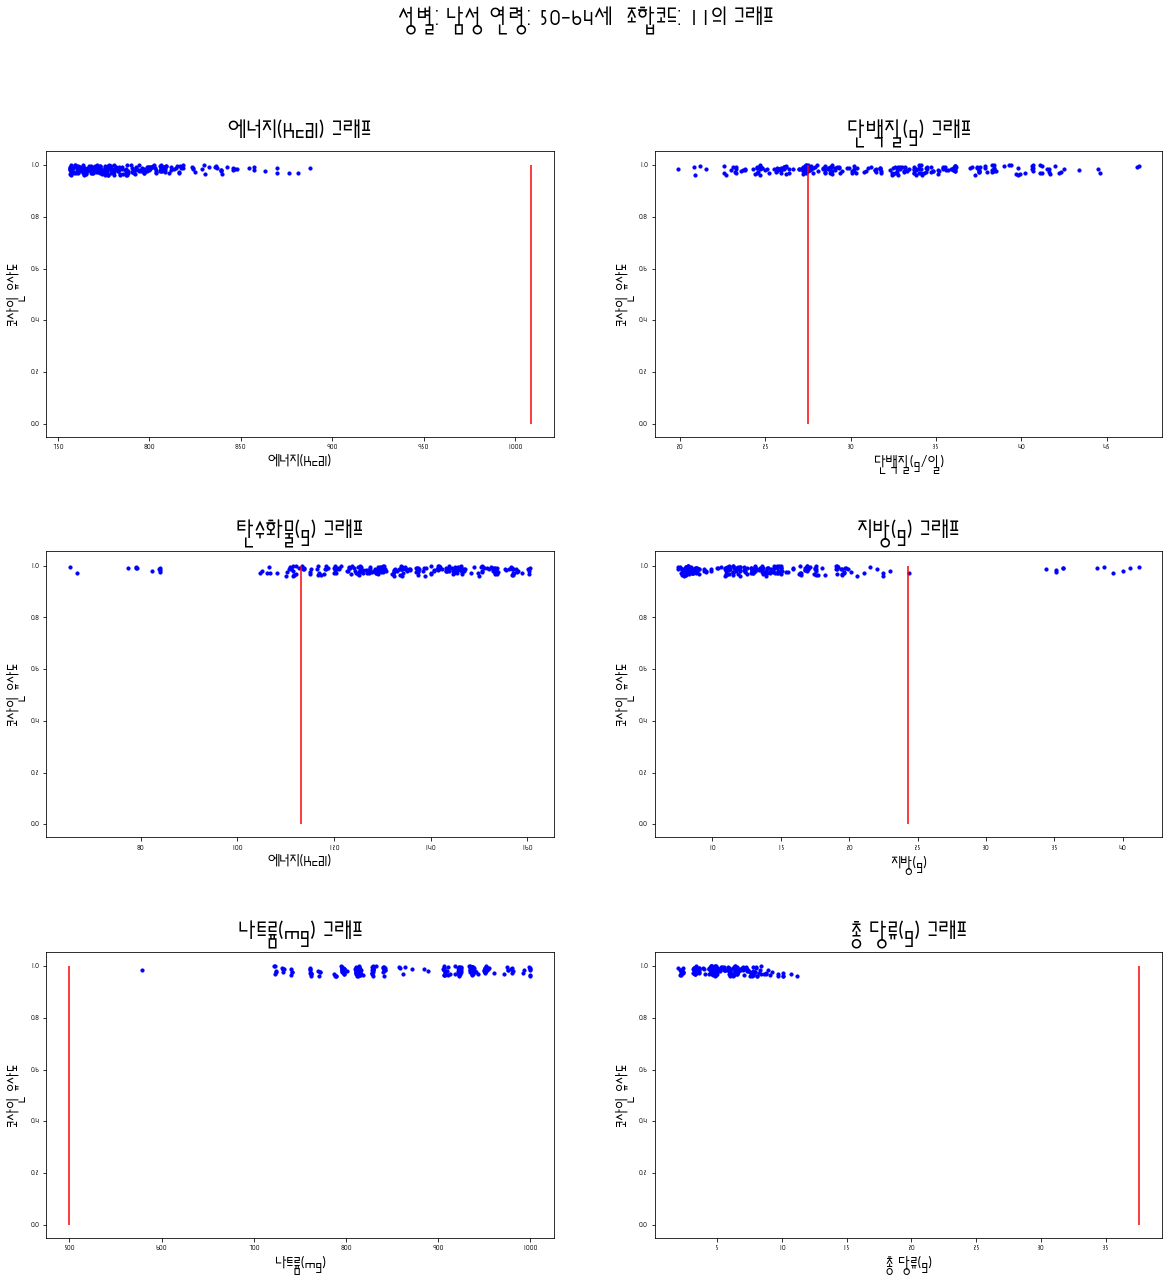

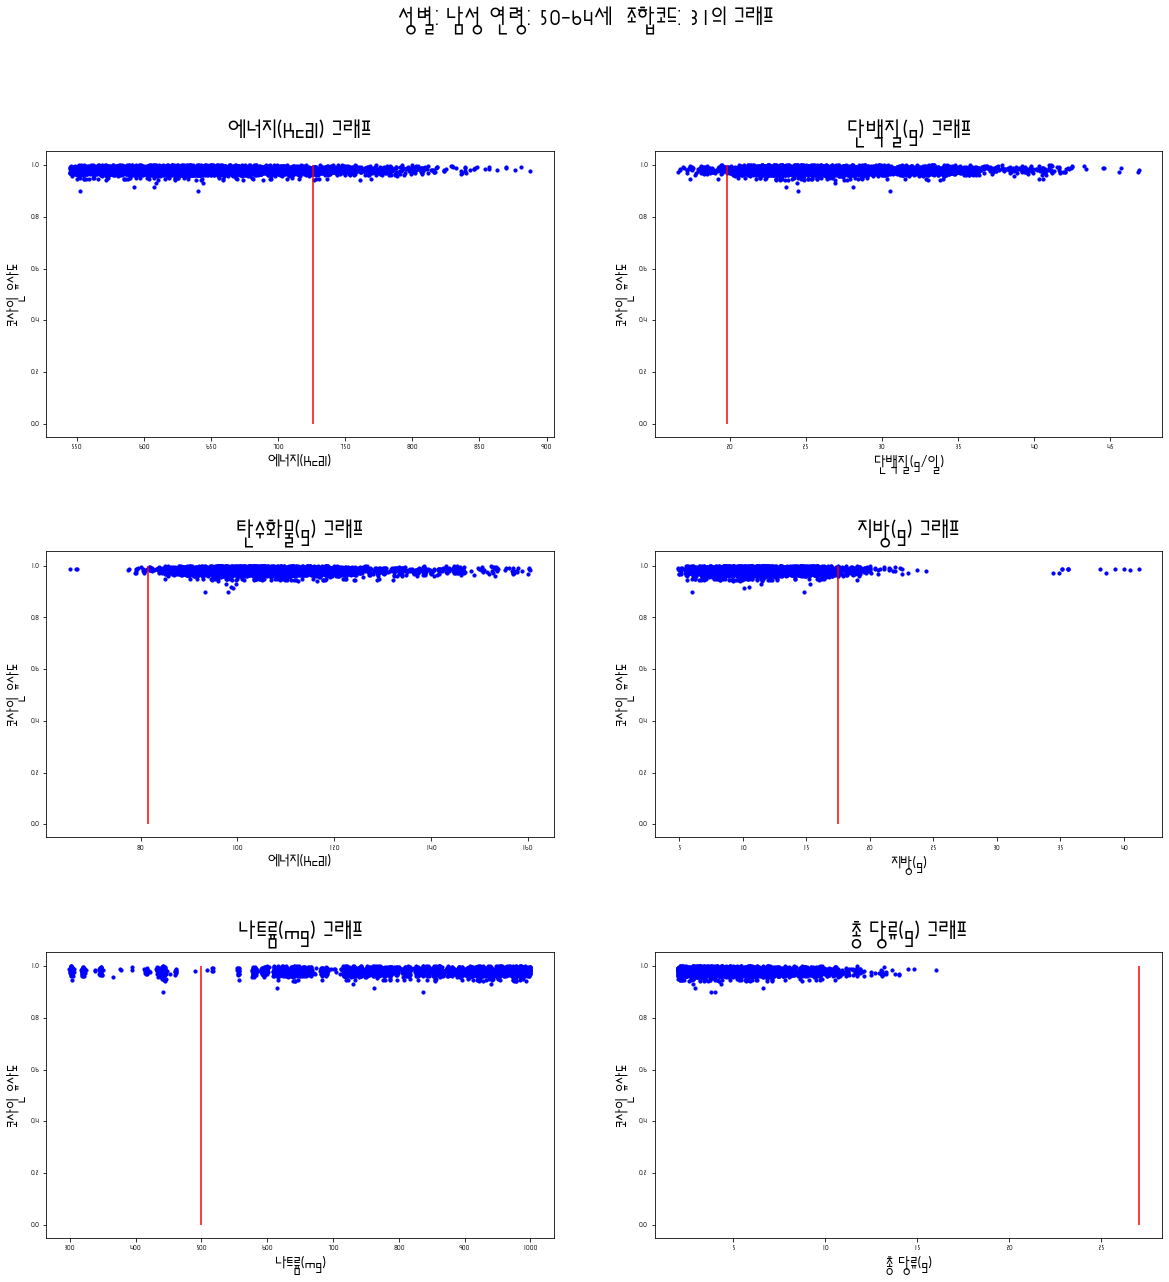

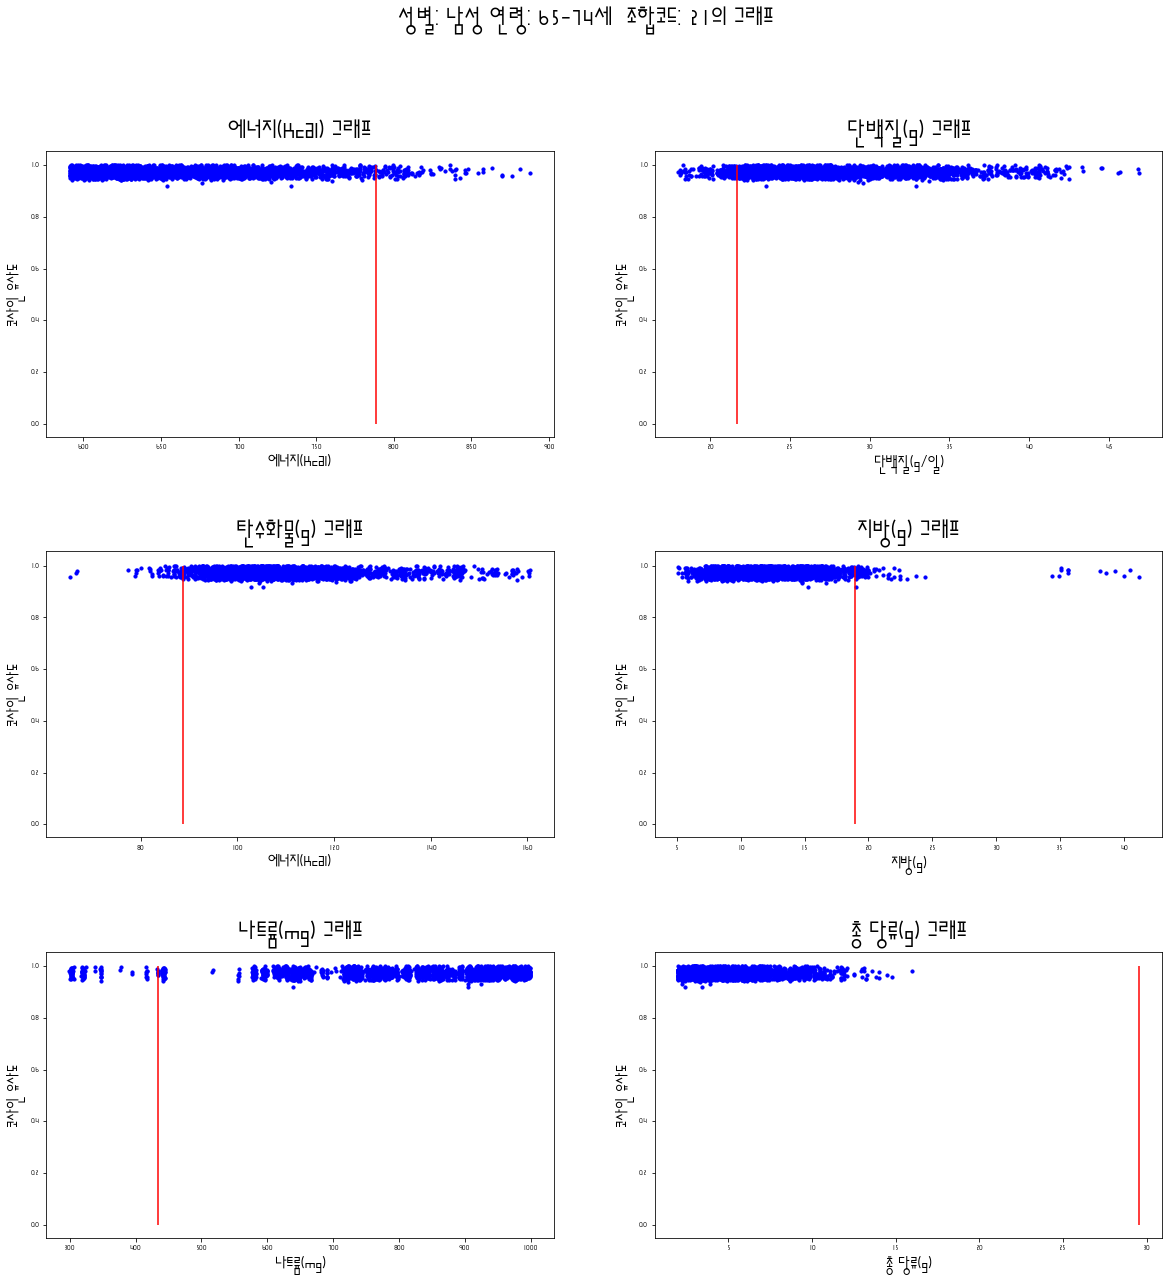

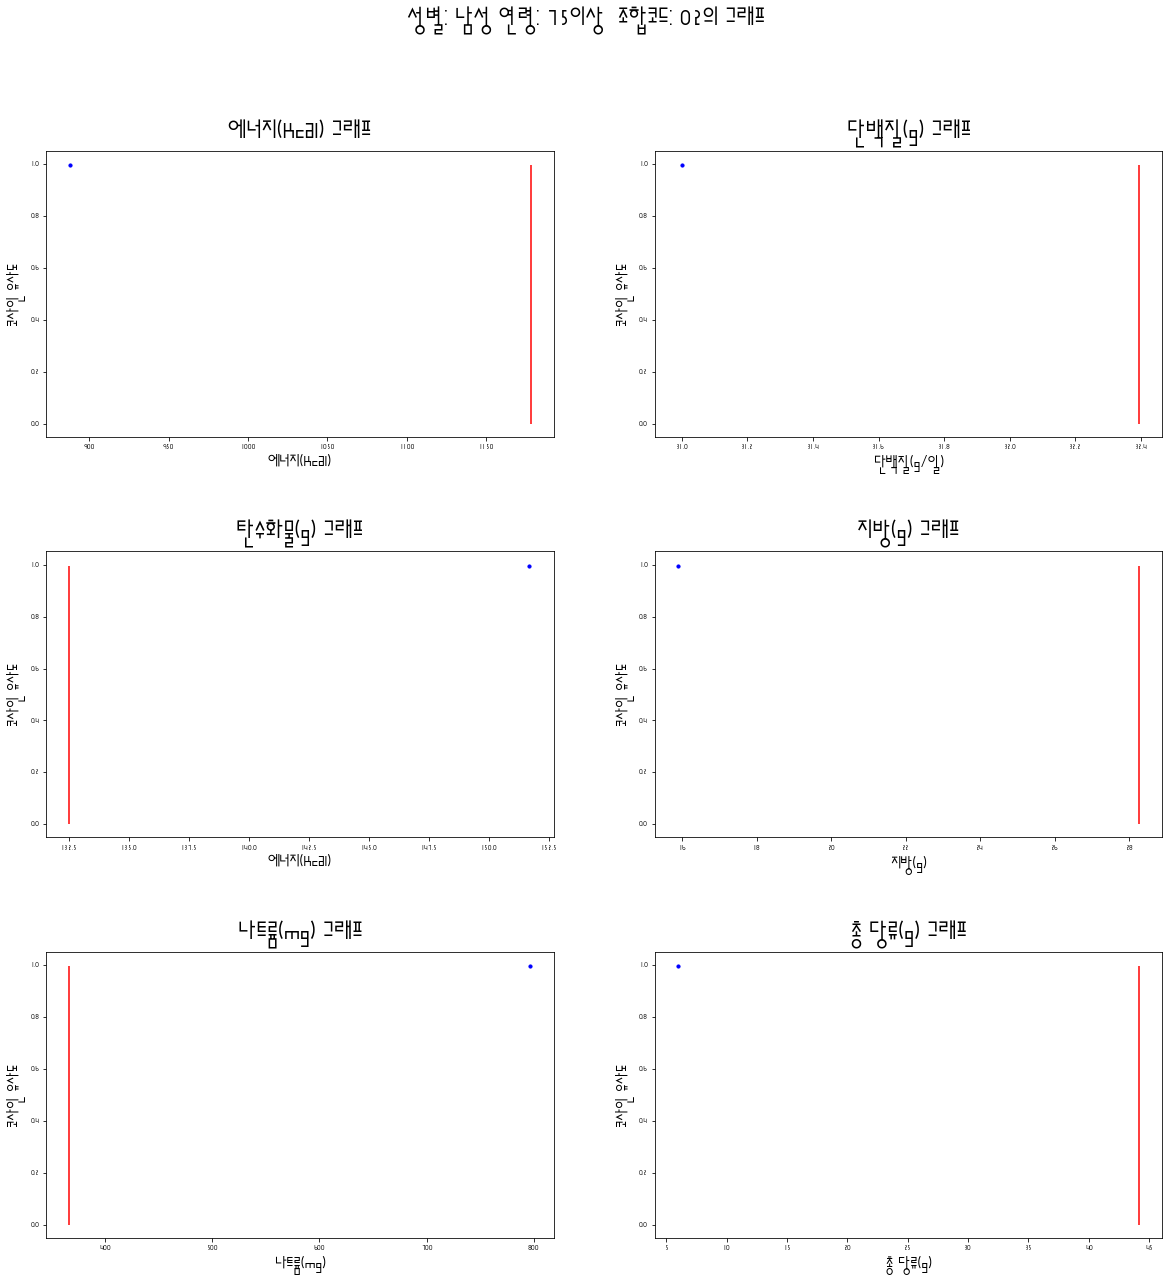

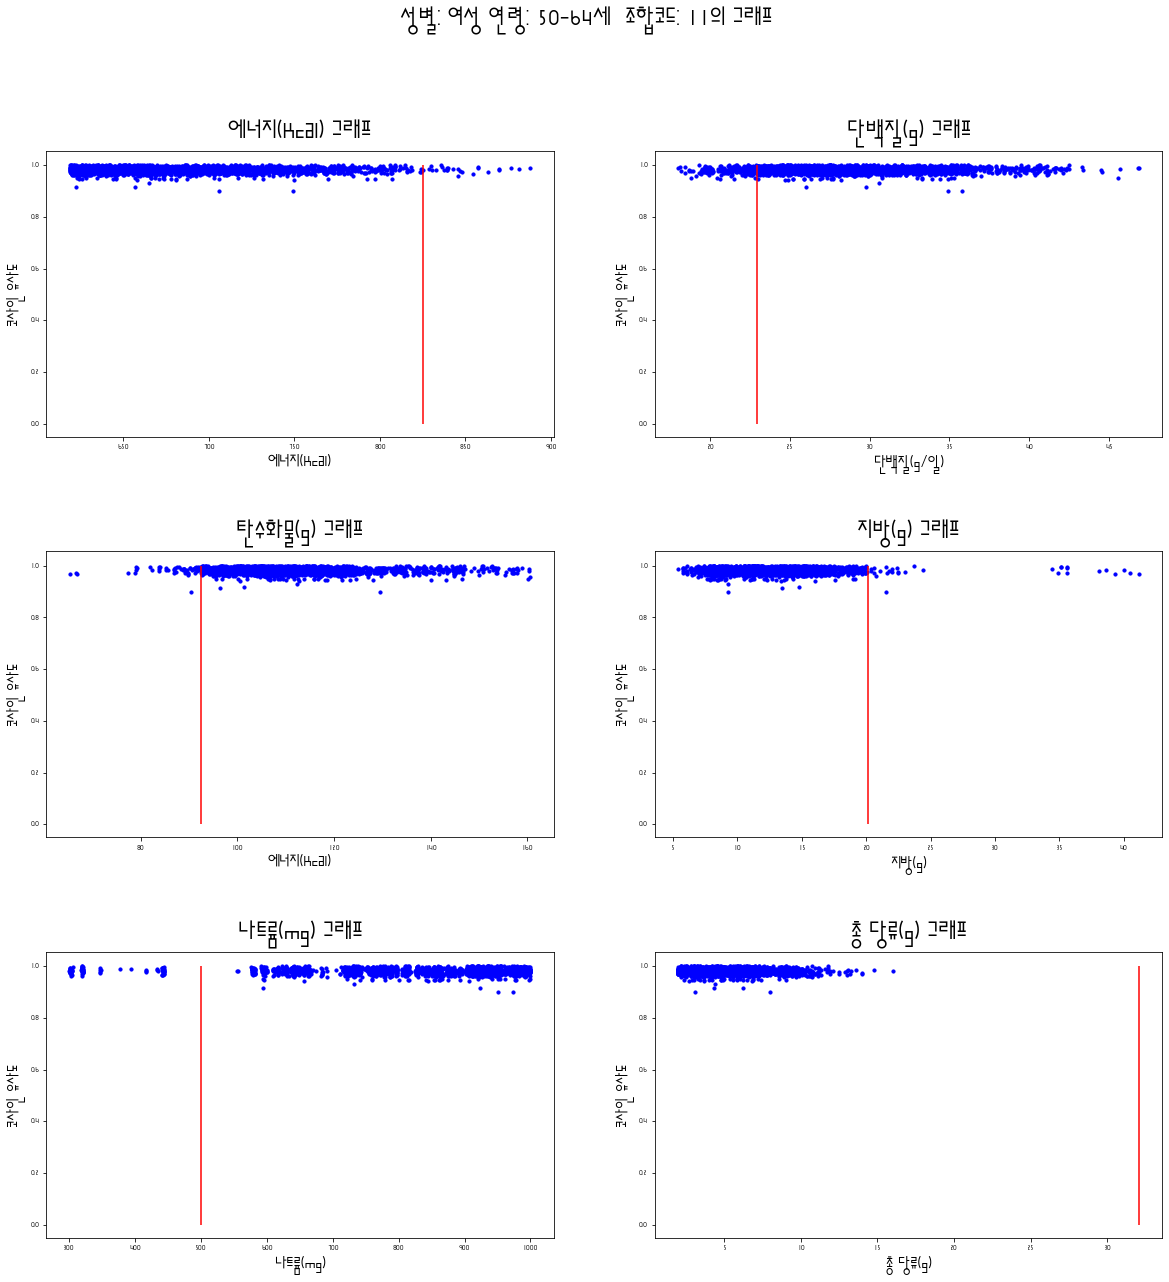

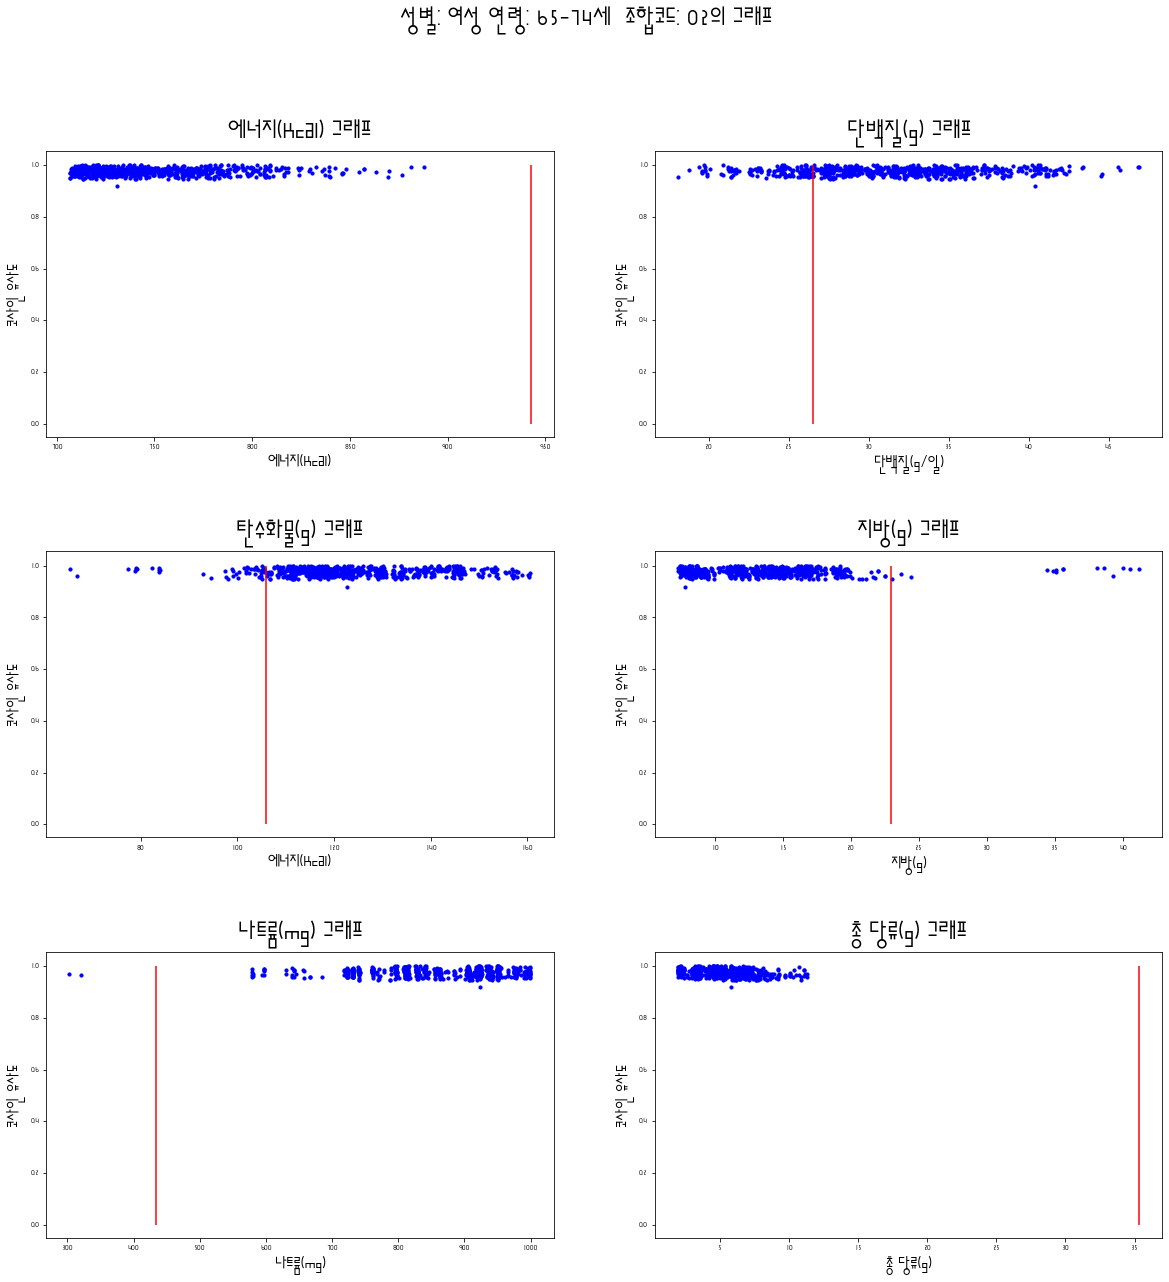

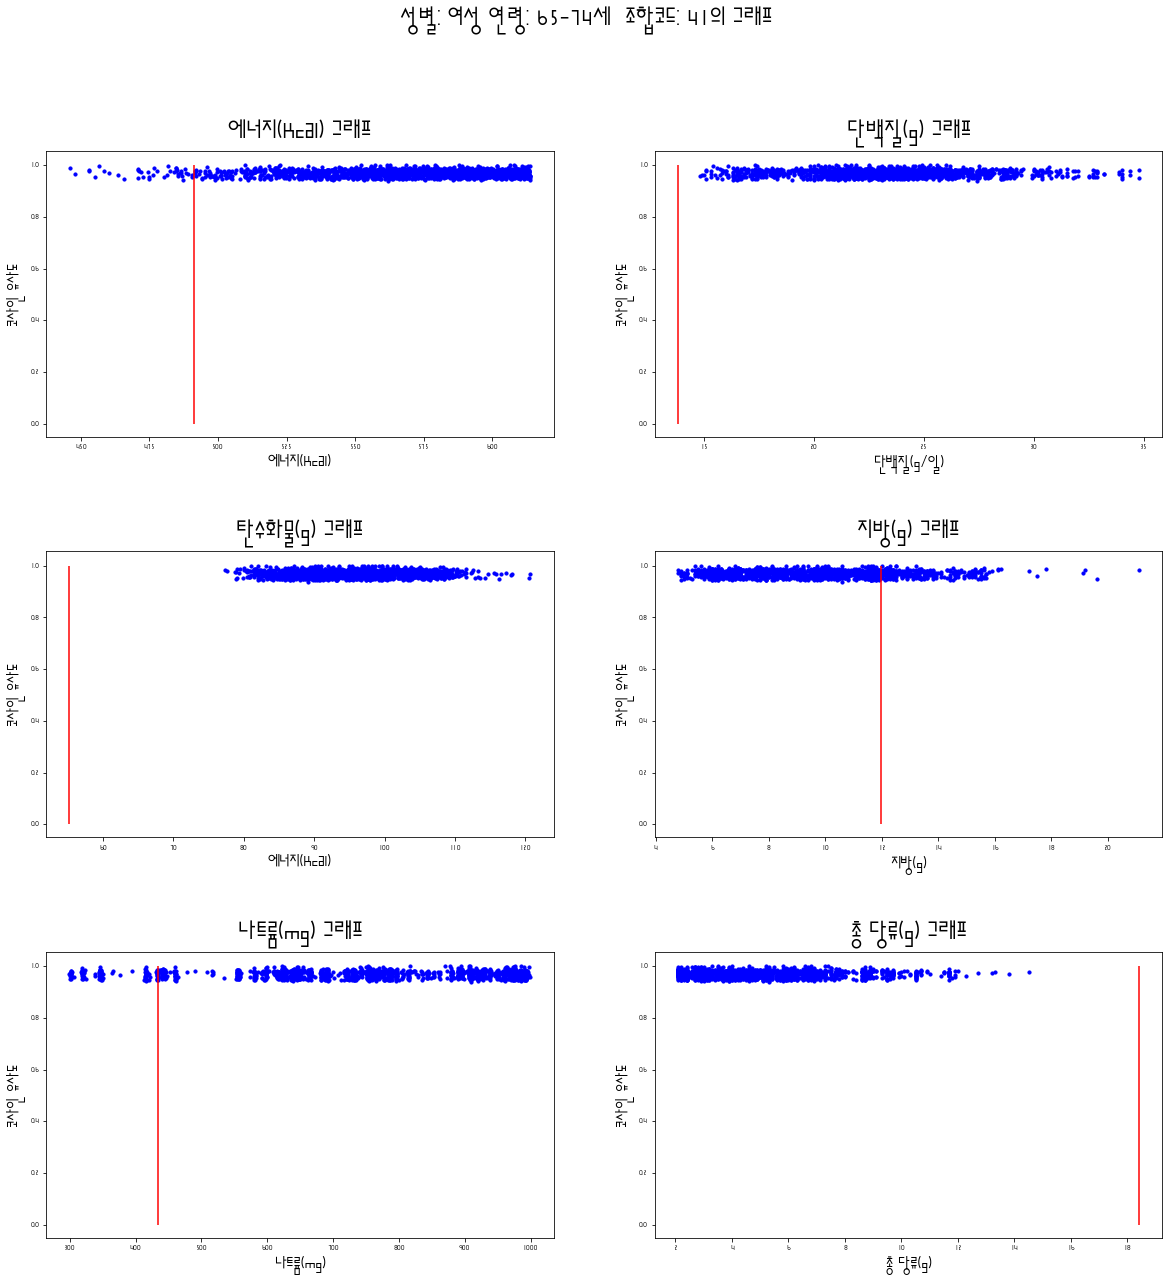

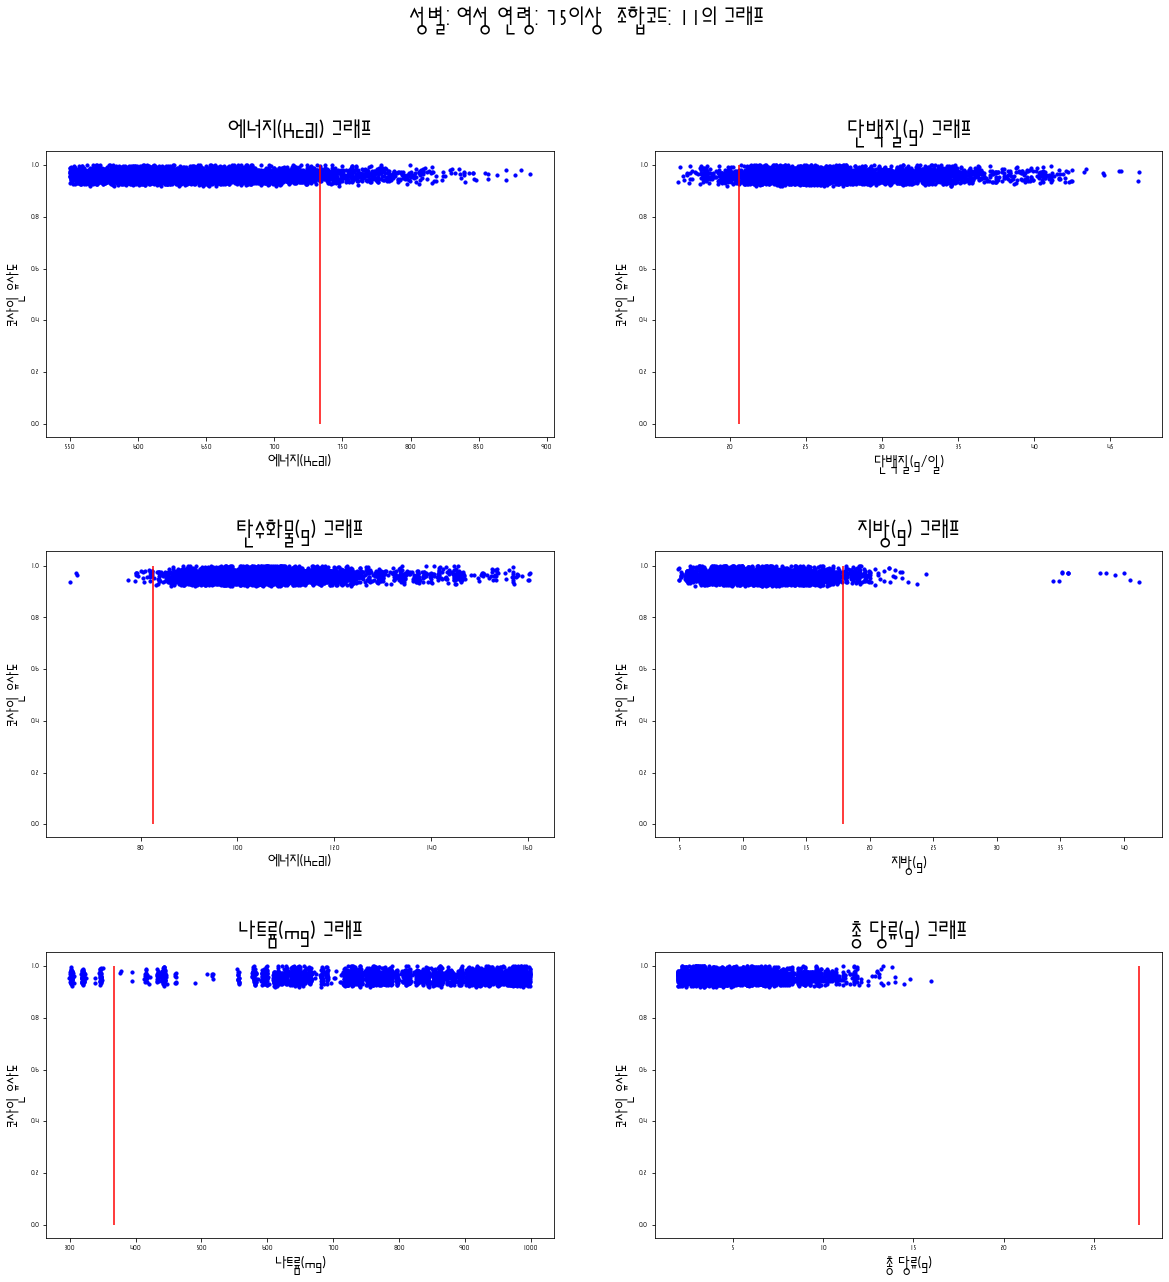

In [41]:
import re
import matplotlib.pyplot as plt

for file in onlyfiles:
    # 엑셀파일 확장자 삭제
    del_extension = re.sub("[.]xlsx","",file)
    del_bracket = re.sub("[(]영양소추가[)]","",del_extension)
    info_list = del_bracket.split("_")
    영양소기준정보 = standard[standard.loc[:,"성별"] == info_list[0]][standard.loc[:,"연령"] == info_list[1]][standard.loc[:,"조합 코드"] == info_list[2]]
    # title로 사용가능: 영양소기준정보["성별"],[연령]
    diet = pd.read_excel("./영양소추가_식단추출_데이터/"+file)
    유사도 = list(diet["유사도"])
    에너지정보 = list(diet["에너지(kcal)"])
    단백질정보 = list(diet["단백질(g)"])
    탄수화물정보 = list(diet["탄수화물(g)"])
    지방정보 = list(diet["지질(g)"])
    당정보 = list(diet["총 당류(g)"])
    나트륨정보 = list(diet["나트륨(mg)"])
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    ax1 = fig.add_subplot(3, 2, 1)
    ax2 = fig.add_subplot(3, 2, 2)
    ax3 = fig.add_subplot(3, 2, 3)
    ax4 = fig.add_subplot(3, 2, 4)
    ax5 = fig.add_subplot(3, 2, 5)
    ax6 = fig.add_subplot(3, 2, 6)
    # 에너지 비교 그래프
    ax1.set_title("에너지(kcal) 그래프", size=30)
    ax1.vlines(x=영양소기준정보["에너지(kcal/일)"], ymin=0, ymax=max(유사도), color='red')
    ax1.scatter(에너지정보,유사도, s=10, color='blue')
    ax1.set_xlabel("에너지(kcal)",fontsize = 20)
    ax1.set_ylabel("코사인 유사도",fontsize = 20)
    # 단백질 비교 그래프
    ax2.set_title("단백질(g) 그래프", size=30)
    ax2.vlines(x=영양소기준정보["단백질(g/일)"], ymin=0, ymax=max(유사도), color='red')
    ax2.scatter(단백질정보,유사도, s=10, color='blue')
    ax2.set_xlabel("단백질(g/일)",fontsize = 20)
    ax2.set_ylabel("코사인 유사도",fontsize = 20)
    # 탄수화물 비교 그래프
    ax3.set_title("탄수화물(g) 그래프", size=30)
    ax3.vlines(x=영양소기준정보["탄수화물(g/일)"], ymin=0, ymax=max(유사도), color='red')
    ax3.scatter(탄수화물정보,유사도, s=10, color='blue')
    ax3.set_xlabel("에너지(kcal)",fontsize = 20)
    ax3.set_ylabel("코사인 유사도",fontsize = 20)
    # 지방 비교 그래프
    ax4.set_title("지방(g) 그래프", size=30)
    ax4.vlines(x=영양소기준정보["지방(g/일)"], ymin=0, ymax=max(유사도), color='red')
    ax4.scatter(지방정보,유사도, s=10, color='blue')
    ax4.set_xlabel("지방(g)",fontsize = 20)
    ax4.set_ylabel("코사인 유사도",fontsize = 20)
    # 나트륨 비교 그래프
    ax5.set_title("나트륨(mg) 그래프", size=30)
    ax5.vlines(x=영양소기준정보["나트륨(mg/일)"], ymin=0, ymax=max(유사도), color='red')
    ax5.scatter(나트륨정보,유사도, s=10, color='blue')
    ax5.set_xlabel("나트륨(mg)",fontsize = 20)
    ax5.set_ylabel("코사인 유사도",fontsize = 20)
    # 당 비교 그래프
    ax6.set_title("총 당류(g) 그래프", size=30)
    ax6.vlines(x=영양소기준정보["총 당류(g/일)"], ymin=0, ymax=max(유사도), color='red')
    ax6.scatter(당정보,유사도, s=10, color='blue')
    ax6.set_xlabel("총 당류(g)",fontsize = 20)
    ax6.set_ylabel("코사인 유사도",fontsize = 20)
    suptitle = (f"성별: {영양소기준정보['성별'].values[0]} 연령: {영양소기준정보['연령'].values[0]}  조합코드: {영양소기준정보['조합 코드'].values[0]}의 그래프")
    fig.suptitle(suptitle, fontsize = 30)
    plt.savefig(del_bracket+'.png', dpi=1200)            

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


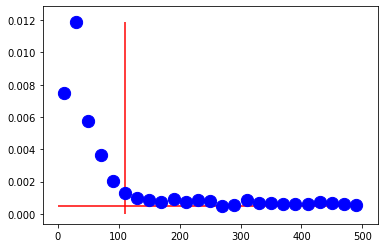

In [140]:
import matplotlib.pyplot as plt

horiz_line = 0.0005
vert_line = 110
x_data = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490]
y_data = [0.0074999999999999997, 0.011875, 0.0057812499999999999, 0.0036458333333333334, 0.0020312500000000001, 0.0013125000000000001, 0.00098958333333333342, 0.00089285714285714283, 0.00074218750000000001, 0.00093749999999999997, 0.00071874999999999999, 0.00088068181818181821, 0.00078125000000000004, 0.0004807692307692308, 0.00055803571428571425, 0.00083333333333333339, 0.00066406250000000005, 0.00069852941176470592, 0.00059027777777777778, 0.00059210526315789478, 0.00062500000000000001, 0.0007291666666666667, 0.00068181818181818187, 0.00059782608695652171, 0.00053385416666666663]

fig = plt.figure() # create the top-level container

# horizontal line
plt.hlines(y=horiz_line, xmin=0, xmax=max(x_data), color='red', zorder=1)

# vertical line
plt.vlines(x=vert_line, ymin=0, ymax=max(y_data), color='red', zorder=2)

plt.scatter(x_data, y_data, s=150, color='blue', zorder=3)

plt.show()

In [43]:
import re

# 전체 파일을 돌면서 영양소 정보를 더해준다.

for file in onlyfiles:
    # 엑셀파일 확장자 삭제
    del_extension = re.sub("[.]xlsx","",onlyfiles[0])
    
    # 각 파일의 정보 단위로 쪼갠 리스트 만들기
    # 3번항목: 밥 / 4번항목: 국 / 5번항목: 메인 / 6번항목: 서브
    info_list = del_extension.split("_")
    
    # 식단파일을 dataframe으로 읽기
    diet = pd.read_excel("./식단추출_데이터/"+file)
    
    # column 별로 파일을 읽어서 각 식단의 음식의 영양소 정보를 해당 row에 축적해서 더해준다.
    밥 = pd.read_excel("./음식_데이터/"+info_list[3]+".xlsx")
    국 = pd.read_excel("./음식_데이터/"+info_list[4]+".xlsx")
    메인 = pd.read_excel("./음식_데이터/"+info_list[5]+".xlsx")
    서브 = pd.read_excel("./음식_데이터/"+info_list[6]+".xlsx")
    밥데이터 = 밥[밥.iloc[:,0]=="쌀밥"]
    밥데이터
    break

In [47]:
밥데이터.iloc[:,5:]

,에너지(kcal),단백질(g),지질(g),탄수화물(g),총 당류(g),총 식이섬유(g),총 지방산(g),나트륨(mg),아연(mg),구리(mg),망간(mg),셀레늄(μg),비타민D(μg),판토텐산(mg),엽산(mg),비타민B12(μg),콜레스테롤(mg)
0,317.7,5.1,0.1,70.7,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
list_1 = [[1,2,3,4],["a","b","c","d"]]

sample_df = pd.DataFrame(list_1)

print(sample_df.iloc[0].T)

0    1
1    2
2    3
3    4
Name: 0, dtype: object


In [110]:
pd.concat([sample_df,밥데이터.iloc[:,5:]],axis = 1)

,0,1,2,3,에너지(kcal),단백질(g),지질(g),탄수화물(g),총 당류(g),총 식이섬유(g),...,나트륨(mg),아연(mg),구리(mg),망간(mg),셀레늄(μg),비타민D(μg),판토텐산(mg),엽산(mg),비타민B12(μg),콜레스테롤(mg)
0,1,2,3,4,317.7,5.1,0.1,70.7,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a,b,c,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
sample_df.join(밥데이터.iloc[:,5:], how='outer')

,0,1,2,3,에너지(kcal),단백질(g),지질(g),탄수화물(g),총 당류(g),총 식이섬유(g),...,나트륨(mg),아연(mg),구리(mg),망간(mg),셀레늄(μg),비타민D(μg),판토텐산(mg),엽산(mg),비타민B12(μg),콜레스테롤(mg)
0,1,2,3,4,317.7,5.1,0.1,70.7,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a,b,c,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
listkk = [[1,2,3,4],[1,2,3,4]]
listqq = [[3,4,5,6],[3,4,5,6]]

# pd.DataFrame(np.array([listkk,listqq]),columns = ["영양소1","영양소2","영양소3","영양소4"])

In [98]:
np.array(listkk)+np.array(listqq)

array([[ 4,  6,  8, 10],
       [ 4,  6,  8, 10]])

In [115]:
최종데이터

,식단번호,밥,국,메인,서브,유사도,에너지(kcal),단백질(g),지질(g),탄수화물(g),...,나트륨(mg),아연(mg),구리(mg),망간(mg),셀레늄(μg),비타민D(μg),판토텐산(mg),엽산(mg),비타민B12(μg),콜레스테롤(mg)
0,24,콩밥(대두),쇠고기두부찌개,달걀부침,콩나물찜,0.999925,763.9,34.0,19.1,112.1,...,917.7,3.0,0.3,1.1,27.1,10.8,1.1,265.4,0.9,176.2
1,35,콩밥(대두),쇠고기찌개,계란후라이,감자구이,0.999802,806.7,34.1,19.0,121.4,...,906.2,4.7,0.5,1.0,38.6,10.5,1.4,257.8,0.9,190.6
2,44,콩밥(대두),부대찌개,미나리강회,감자구이,0.999795,794.6,40.7,11.5,130.4,...,951.7,3.5,0.6,1.5,22.5,2.4,1.7,246.3,2.0,30.5
3,49,콩밥(대두),돼지고기찌개,계란후라이,감자구이,0.999783,787.8,38.4,16.4,118.3,...,723.2,4.6,0.4,1.0,38.4,11.0,1.3,243.4,0.9,206.5
4,52,팥밥,쇠고기두부찌개,두부찜,떡꼬치구이,0.999663,829.8,28.9,11.2,150.6,...,813.9,3.1,0.3,1.4,18.0,4.5,0.5,97.9,0.7,77.6
5,37,콩밥(대두),부대찌개,두부찜,감자구이,0.999656,818.5,39.4,14.5,130.2,...,828.8,3.5,0.5,1.6,29.9,4.2,1.2,237.8,0.5,87.9
6,3,찰밥,쇠고기두부찌개,계란후라이,떡꼬치구이,0.999655,790.3,24.7,13.1,140.0,...,794.2,2.4,0.1,0.6,26.9,10.8,0.7,72.3,0.9,176.2
7,4,찰밥,쇠고기두부찌개,부추강회,떡꼬치구이,0.999655,759.7,27.4,8.2,141.6,...,933.2,2.4,0.3,0.6,9.2,2.7,0.8,36.9,2.2,20.2
8,48,콩밥(대두),돼지고기찌개,계란후라이,옥수수구이,0.999539,771.7,38.3,16.9,113.4,...,722.4,4.0,0.2,0.8,32.6,11.0,0.8,214.8,0.9,206.5
9,6,현미밥,쇠고기두부찌개,두부찜,떡꼬치구이,0.999510,780.9,28.0,14.9,133.9,...,832.4,2.6,0.2,1.0,17.1,4.5,0.4,59.9,0.7,77.6
